In [2]:
#!pip3 install -r requirements.txt

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
responses = pd.read_csv('../../data/repsonses.csv')
responses = responses.drop('Timestamp', axis=1)

In [11]:
moods = responses.columns
moods = [s.replace(
    'For each of the following labels, please indicate whether you believe it can be considered a mood or not ', '') for s in moods]
moods = [s.strip('[]') for s in moods]
responses.columns = moods
# responses

In [12]:
responses

,acoustic,adrenaline,aggressive,agitated,angry,anxiety,atmosphere,ballroom,beat,bizarre,...,soul,soulful,space,strong,suggestive,summertime,traditional blues,travel,vintage,weird
0,Not Mood,Mood,Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Not Mood,Mood,Not Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood
1,Not Mood,Not Mood,Not Mood,Mood,Not Mood,Not Mood,Mood,Not Mood,Not Mood,Mood,...,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood,Not Mood,Not Mood,Not Mood,Mood
2,Not Mood,Mood,Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Mood,Mood,Not Mood,Mood,Not Mood,Not Mood,Not Mood,Mood,Not Mood,Mood
3,Mood,Mood,Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Mood,Mood,Not Mood,Mood,Not Mood,Mood,Mood,Not Mood,Not Mood,Mood
4,Not Mood,Not Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood,...,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood
5,Not Mood,Not Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Not Mood,Mood,Not Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood
6,Mood,Mood,Mood,Not Mood,Mood,Not Mood,Mood,Mood,Mood,Mood,...,Mood,Mood,Mood,Mood,Mood,Mood,Mood,Mood,Mood,Mood
7,Mood,Not Mood,Mood,Mood,Mood,Not Mood,Not Mood,Mood,Mood,Mood,...,Mood,Mood,Not Mood,Mood,Mood,Mood,Not Mood,Mood,Mood,Mood
8,Not Mood,Mood,Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood,Not Mood
9,Not Mood,Not Mood,Mood,Mood,Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,...,Not Mood,Mood,Not Mood,Not Mood,Mood,Not Mood,Not Mood,Not Mood,Not Mood,Mood


In [74]:
response_df = pd.DataFrame(columns=['Label', 'Not Mood', 'Mood'])

for i in range(len(moods)):
    row_series = responses[moods[i]].value_counts()
    row_df = pd.DataFrame(row_series).T
    row_df['Label'] = moods[i]
    response_df = pd.concat([response_df, row_df], axis=0, ignore_index=True)

response_df.reset_index(drop=True, inplace=True)
response_df.set_index('Label', inplace=True)

In [75]:
response_df

,Not Mood,Mood
Label,,
acoustic,11,4
adrenaline,9,6
aggressive,2,13
agitated,3,12
angry,1,14
...,...,...
summertime,9,6
traditional blues,11,4
travel,10,5


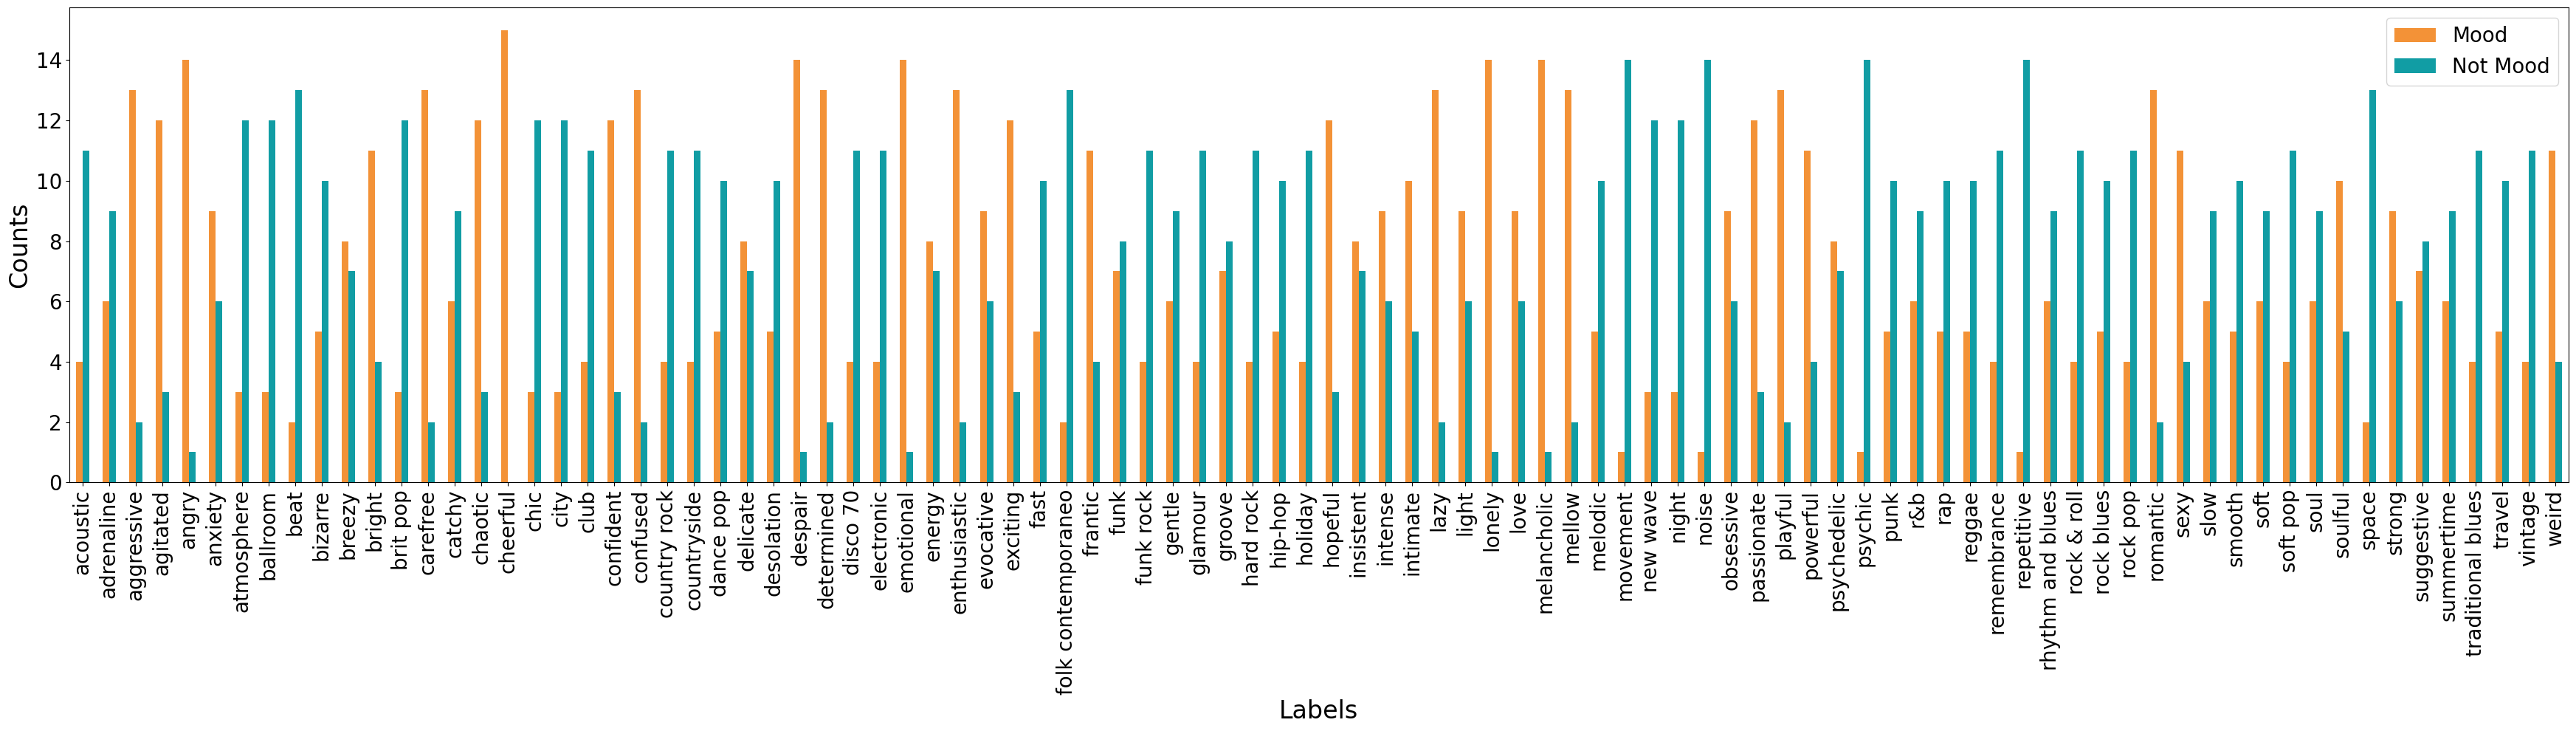

In [77]:
response_df.plot.bar(y=['Mood', 'Not Mood'], figsize=(35, 10), width=0.5, color=('#F39237', '#119DA4'))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Labels', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(loc='upper right', prop={'size': 20})
plt.tight_layout()
plt.savefig('../../plots/mood_label_survey_responses.png')
plt.show()